In [1]:
import pandas as pd

In [2]:
df1 = pd.read_excel("Aracaju.xlsx")
df2 = pd.read_excel("Fortaleza.xlsx")
df3 = pd.read_excel("Natal.xlsx")
df4 = pd.read_excel("Recife.xlsx")
df5 = pd.read_excel("Salvador.xlsx")

In [3]:
#Concat coloca um arquivo embaixo do outro
df = pd.concat([df1,df2,df3,df4,df5])

In [4]:
df.head()

,Cidade,Data,Vendas,LojaID,Qtde
0,Aracaju,2018-01-01,142.00,1520,1
1,Aracaju,2018-01-01,14.21,1522,6
2,Aracaju,2018-01-01,71.55,1520,1
3,Aracaju,2018-01-01,3.01,1521,7
4,Aracaju,2018-01-01,24.51,1522,8


In [5]:
df.tail()

,Cidade,Data,Vendas,LojaID,Qtde
235,Salvador,2019-01-03,41.84,1034,1
236,Salvador,2019-01-03,126.29,1035,3
237,Salvador,2019-01-03,38.06,1036,3
238,Salvador,2019-01-03,139.64,1035,1
239,Salvador,2019-01-03,161.41,1037,3


In [7]:
#Pegando uma amostra do banco de dados
df.sample(5)

,Cidade,Data,Vendas,LojaID,Qtde
74,Salvador,2019-01-01,170.53,1035,2
98,Fortaleza,2019-01-01,15.00,1005,2
114,Salvador,2019-03-02,25.52,1034,1
48,Aracaju,2018-01-01,35.90,1521,8
43,Recife,2019-01-01,22.29,983,7


In [9]:
df.dtypes

Cidade            object
Data      datetime64[ns]
Vendas           float64
LojaID             int64
Qtde               int64
dtype: object

In [11]:
#Alterando o formato dos dados de uma coluna
df["LojaID"] = df["LojaID"].astype("object")
df.dtypes

Cidade            object
Data      datetime64[ns]
Vendas           float64
LojaID            object
Qtde               int64
dtype: object

In [12]:
#Verificando se há valores nulos
df.isnull().sum()

Cidade    0
Data      0
Vendas    0
LojaID    0
Qtde      0
dtype: int64

In [13]:
#Substituindo os valores nulos pela média (pega a média de vendas e substitui onde está vazio)
#inplace - valor é substituído e salvo em memória e não só nesta linha de código
df["Vendas"].fillna(df["Vendas"].mean(), inplace = True)

In [ ]:
#Substituindo os valores nulos por zero
df["Vendas"].fillna(0, inplace = True)

In [14]:
#Apagando linhas com valores nulos
df.dropna(inplace = True)

In [15]:
#Apagando linhas com valores nulos com base nos valores de venda
df.dropna(subset=["Vendas"], inplace = True)

In [17]:
#Removendo linhas que estão com valores faltantes em todas as colunas
df.dropna(how="all", inplace = True)

In [19]:
#Crianco coluna nova (mul de multiplicação)
df["Receita"] = df["Vendas"].mul(df["Qtde"]) 
df.head()

,Cidade,Data,Vendas,LojaID,Qtde,Receita
0,Aracaju,2018-01-01,142.00,1520,1,142.00
1,Aracaju,2018-01-01,14.21,1522,6,85.26
2,Aracaju,2018-01-01,71.55,1520,1,71.55
3,Aracaju,2018-01-01,3.01,1521,7,21.07
4,Aracaju,2018-01-01,24.51,1522,8,196.08


In [20]:
df["Receita/Vendas"] = df["Receita"] / df["Vendas"]
df.head()

,Cidade,Data,Vendas,LojaID,Qtde,Receita,Receita/Vendas
0,Aracaju,2018-01-01,142.00,1520,1,142.00,1.0
1,Aracaju,2018-01-01,14.21,1522,6,85.26,6.0
2,Aracaju,2018-01-01,71.55,1520,1,71.55,1.0
3,Aracaju,2018-01-01,3.01,1521,7,21.07,7.0
4,Aracaju,2018-01-01,24.51,1522,8,196.08,8.0


In [21]:
#Retornando a maior receita
df["Receita"].max()

3544.0

In [22]:
#Retornando a menor receita
df["Receita"].min()

3.34

In [23]:
#Top 3 com base em Receita
df.nlargest(3, "Receita")

,Cidade,Data,Vendas,LojaID,Qtde,Receita,Receita/Vendas
7,Natal,2019-03-18,886.0,853,4,3544.0,4.0
51,Natal,2018-01-21,859.0,852,4,3436.0,4.0
55,Natal,2019-01-08,859.0,854,4,3436.0,4.0


In [24]:
#Top 3 (piores) com base em Receita
df.nsmallest(3, "Receita")

,Cidade,Data,Vendas,LojaID,Qtde,Receita,Receita/Vendas
118,Aracaju,2018-01-01,3.34,1522,1,3.34,1.0
65,Recife,2019-01-01,4.01,981,1,4.01,1.0
92,Natal,2019-01-02,4.57,1035,1,4.57,1.0


In [25]:
#Agrupando por cidade e retornando receita
df.groupby("Cidade")["Receita"].sum()

Cidade
Aracaju       48748.25
Fortaleza     37913.97
Natal        167227.52
Recife        51936.51
Salvador      40596.73
Name: Receita, dtype: float64

In [26]:
#Ordenando o conjunto de dados
df.sort_values("Receita", ascending=False).head(10)

,Cidade,Data,Vendas,LojaID,Qtde,Receita,Receita/Vendas
7,Natal,2019-03-18,886.0,853,4,3544.0,4.0
55,Natal,2019-01-08,859.0,854,4,3436.0,4.0
51,Natal,2018-01-21,859.0,852,4,3436.0,4.0
30,Natal,2018-10-02,856.0,853,4,3424.0,4.0
41,Natal,2018-05-20,835.0,852,4,3340.0,4.0
38,Natal,2018-02-25,828.0,852,4,3312.0,4.0
10,Natal,2018-10-27,828.0,852,4,3312.0,4.0
69,Natal,2019-03-24,817.0,852,4,3268.0,4.0
62,Natal,2018-02-10,793.0,854,4,3172.0,4.0
52,Natal,2018-04-27,778.0,854,4,3112.0,4.0


In [28]:
#Tranformando coluna data em tipo inteiro
df["Data"] = df["Data"].astype("int64")
df.dtypes

Cidade             object
Data                int64
Vendas            float64
LojaID             object
Qtde                int64
Receita           float64
Receita/Vendas    float64
dtype: object

In [29]:
#Tranformando coluna data em data
df["Data"] = pd.to_datetime(df["Data"])
df.dtypes

Cidade                    object
Data              datetime64[ns]
Vendas                   float64
LojaID                    object
Qtde                       int64
Receita                  float64
Receita/Vendas           float64
dtype: object

In [30]:
#Agrupando por ano
#dt.year para ir na minha data e extrair apenas o ano
df.groupby(df["Data"].dt.year)["Receita"].sum()

Data
2018    118176.53
2019    228246.45
Name: Receita, dtype: float64

In [32]:
#Criando uma nova coluna de ano
df["anoVenda"] = df["Data"].dt.year
df.sample(5)

,Cidade,Data,Vendas,LojaID,Qtde,Receita,Receita/Vendas,anoVenda
79,Salvador,2019-01-01,19.02,1034,2,38.04,2.0,2019
26,Natal,2018-07-20,370.00,853,3,1110.00,3.0,2018
24,Natal,2018-04-22,868.00,854,3,2604.00,3.0,2018
34,Aracaju,2018-01-01,38.25,1521,6,229.50,6.0,2018
45,Recife,2019-01-01,15.90,983,8,127.20,8.0,2019


In [33]:
#Extraindo o mês e o dia
df["mesVenda"], df["diaVenda"] = df["Data"].dt.month, df["Data"].dt.day
df.sample(5)

,Cidade,Data,Vendas,LojaID,Qtde,Receita,Receita/Vendas,anoVenda,mesVenda,diaVenda
87,Natal,2019-01-02,135.19,1034,2,270.38,2.0,2019,1,2
74,Salvador,2019-01-01,170.53,1035,2,341.06,2.0,2019,1,1
3,Aracaju,2018-01-01,3.01,1521,7,21.07,7.0,2018,1,1
200,Natal,2019-01-02,41.06,1035,1,41.06,1.0,2019,1,2
98,Salvador,2019-01-01,231.76,1036,3,695.28,3.0,2019,1,1


In [34]:
#Retornando a data mais antiga
df["Data"].min()

Timestamp('2018-01-01 00:00:00')

In [35]:
#Calculando a diferença de dias
df["Diferença de dias"] = df["Data"] - df["Data"].min()
df.sample(5)

,Cidade,Data,Vendas,LojaID,Qtde,Receita,Receita/Vendas,anoVenda,mesVenda,diaVenda,Diferença de dias
236,Salvador,2019-01-03,126.29,1035,3,378.87,3.0,2019,1,3,367 days
57,Aracaju,2018-01-01,23.49,1520,7,164.43,7.0,2018,1,1,0 days
81,Aracaju,2018-01-01,53.41,1520,2,106.82,2.0,2018,1,1,0 days
197,Salvador,2019-01-02,10.45,1036,2,20.90,2.0,2019,1,2,366 days
205,Salvador,2019-01-02,196.09,1037,1,196.09,1.0,2019,1,2,366 days


In [38]:
#Criando a coluna de trimestre
df["trimestreVenda"] = df["Data"].dt.quarter
df.sample(5)

,Cidade,Data,Vendas,LojaID,Qtde,Receita,Receita/Vendas,anoVenda,mesVenda,diaVenda,Diferença de dias,trimestreVenda
12,Natal,2019-02-02,709.00,853,3,2127.00,3.0,2019,2,2,397 days,1
109,Recife,2019-03-02,18.90,982,6,113.40,6.0,2019,3,2,425 days,1
77,Natal,2019-04-01,426.00,853,3,1278.00,3.0,2019,4,1,455 days,2
60,Salvador,2019-01-01,96.01,1034,2,192.02,2.0,2019,1,1,365 days,1
31,Natal,2018-04-03,401.00,854,4,1604.00,4.0,2018,4,3,92 days,2


In [42]:
#Filtrando as vendas de 2019 no mês de janeiro
vendasMarco19 = df.loc[(df["Data"].dt.year == 2019) & (df["Data"].dt.month == 1)]
vendasMarco19.sample(3)

,Cidade,Data,Vendas,LojaID,Qtde,Receita,Receita/Vendas,anoVenda,mesVenda,diaVenda,Diferença de dias,trimestreVenda
45,Recife,2019-01-01,15.90,983,8,127.20,8.0,2019,1,1,365 days,1
50,Fortaleza,2019-01-01,33.69,1005,3,101.07,3.0,2019,1,1,365 days,1
64,Fortaleza,2019-01-01,110.31,1005,4,441.24,4.0,2019,1,1,365 days,1


In [43]:
#Verifica quantas vezes cada LojaID se repetiu no banco de dados
#LojaID 1036 realizou 117 vendas
df["LojaID"].value_counts(ascending=False)

1036    117
1035    112
1037    101
1034     67
983      65
982      44
1522     41
1520     39
980      36
981      31
1005     30
1002     30
852      29
1523     29
1004     28
854      28
853      26
1521     21
1003     20
Name: LojaID, dtype: int64

<AxesSubplot:>

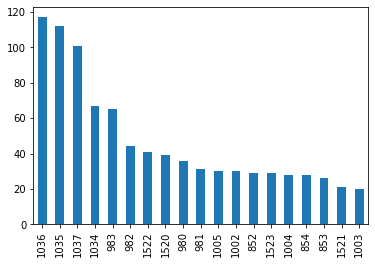

In [44]:
#Montando um gráfico: basta usar.plot.bar()
df["LojaID"].value_counts(ascending=False).plot.bar()

<AxesSubplot:>

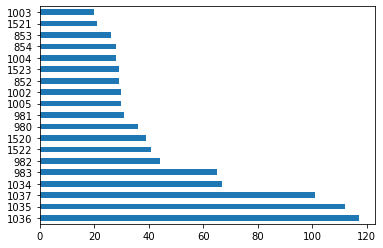

In [45]:
#Montando um gráfico de barras horizontais: basta usar.plot.barh()
df["LojaID"].value_counts(ascending=False).plot.barh()

<AxesSubplot:>

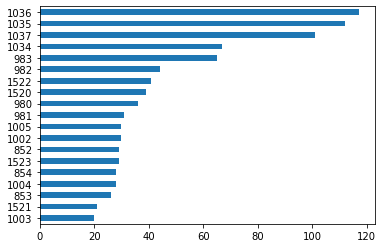

In [46]:
#Montando um gráfico de barras horizontais: basta usar.plot.barh()
#Para os valores virem na ordem crescente (ascending=True)
df["LojaID"].value_counts(ascending=True).plot.barh()

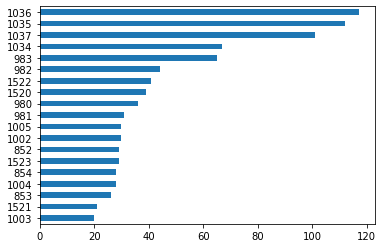

In [47]:
#PAra não vir a linha de texto em cima do gráfico: usar ";" no final
df["LojaID"].value_counts(ascending=True).plot.barh();

<AxesSubplot:ylabel='Receita'>

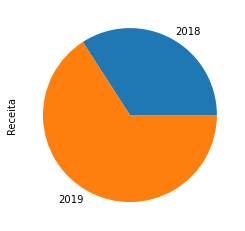

In [48]:
#Gráfico de pizza: .plot.pie()
df.groupby(df["Data"].dt.year)["Receita"].sum().plot.pie()

In [50]:
#Total de vendas por cidade
df["Cidade"].value_counts()

Natal        240
Salvador     240
Fortaleza    142
Recife       142
Aracaju      130
Name: Cidade, dtype: int64

Text(0, 0.5, 'Total de vendas')

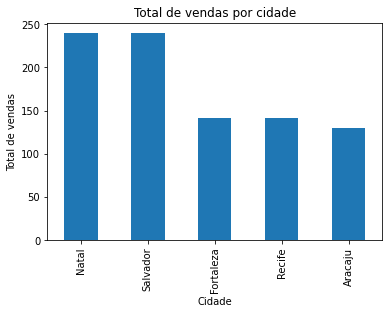

In [53]:
import matplotlib.pyplot as plt
df["Cidade"].value_counts().plot.bar(title = "Total de vendas por cidade")
plt.xlabel("Cidade")
plt.ylabel("Total de vendas")

Text(0, 0.5, 'Total de vendas')

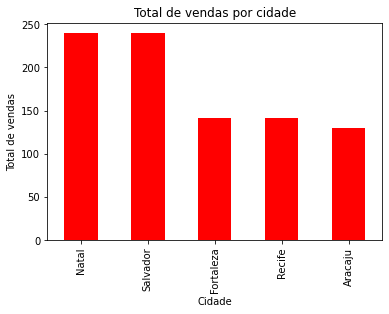

In [54]:
#Alterando a cor
df["Cidade"].value_counts().plot.bar(title = "Total de vendas por cidade", color="red")
plt.xlabel("Cidade")
plt.ylabel("Total de vendas")

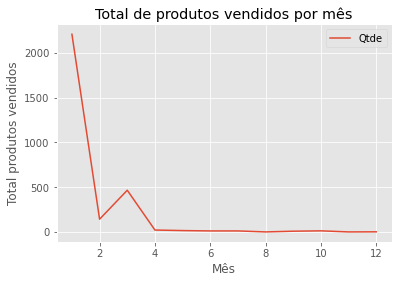

In [60]:
#Alterando o estilo (site matplotlib mostra todos os estilos disponíveis)
plt.style.use("ggplot")
#Agrupei mês de venda, peguei a qtde de prod vendidos e passei uma soma
#.plot() representa gráfico de linhas
df.groupby(df["mesVenda"])["Qtde"].sum().plot(title = "Total de produtos vendidos por mês")
plt.xlabel("Mês")
plt.ylabel("Total produtos vendidos")
plt.legend()

In [61]:
#Selecionando apenas o ano de 2019
df2019 = df[df["anoVenda"]==2019]

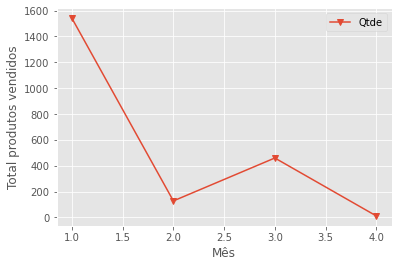

In [62]:
#Total de produtos vendidos por mÊs
#Marker (marcador) v, o, *,....
df2019.groupby(df2019["mesVenda"])["Qtde"].sum().plot(marker = "v")
plt.xlabel("Mês")
plt.ylabel("Total produtos vendidos")
plt.legend()

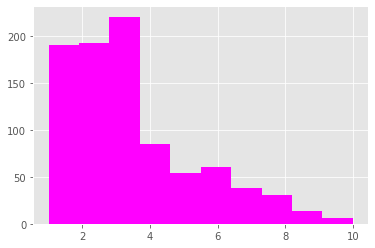

In [63]:
#Histograma
plt.hist(df["Qtde"],color="magenta");

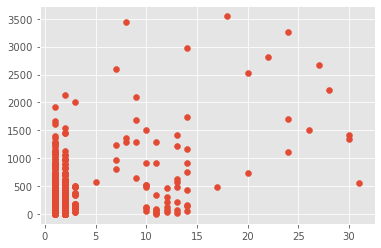

In [64]:
plt.scatter(x=df2019["diaVenda"],y = df2019["Receita"]);

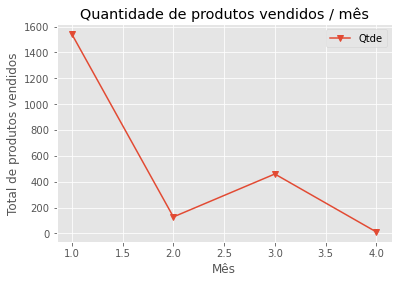

In [66]:
#Salvando em png
df2019.groupby(df2019["mesVenda"])["Qtde"].sum().plot(marker = "v")
plt.title("Quantidade de produtos vendidos / mês")
plt.xlabel("Mês")
plt.ylabel("Total de produtos vendidos")
plt.legend()
plt.savefig("grafQtdeMes.png")